Dig a bit more in the model.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#plt.style.use('ggplot')
plt.style.use('seaborn-paper')
#mpl.rcParams['xtick.labelsize'] = 8
#mpl.rcParams["image.cmap"] = 'gray'
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

In [2]:
from joblib import load

model = load('models/r_roll_lr_model_20220120.joblib')
coef = model.named_steps['lr'].coef_

In [10]:
from wasafacies import Evaluation, PrepareData

eva = Evaluation()
Facies = eva.get_Facies()

prepare = PrepareData()
facies, id_list = prepare.create_recla()

data_df = prepare.create_roll(facies=facies, id_list=id_list)

20220303


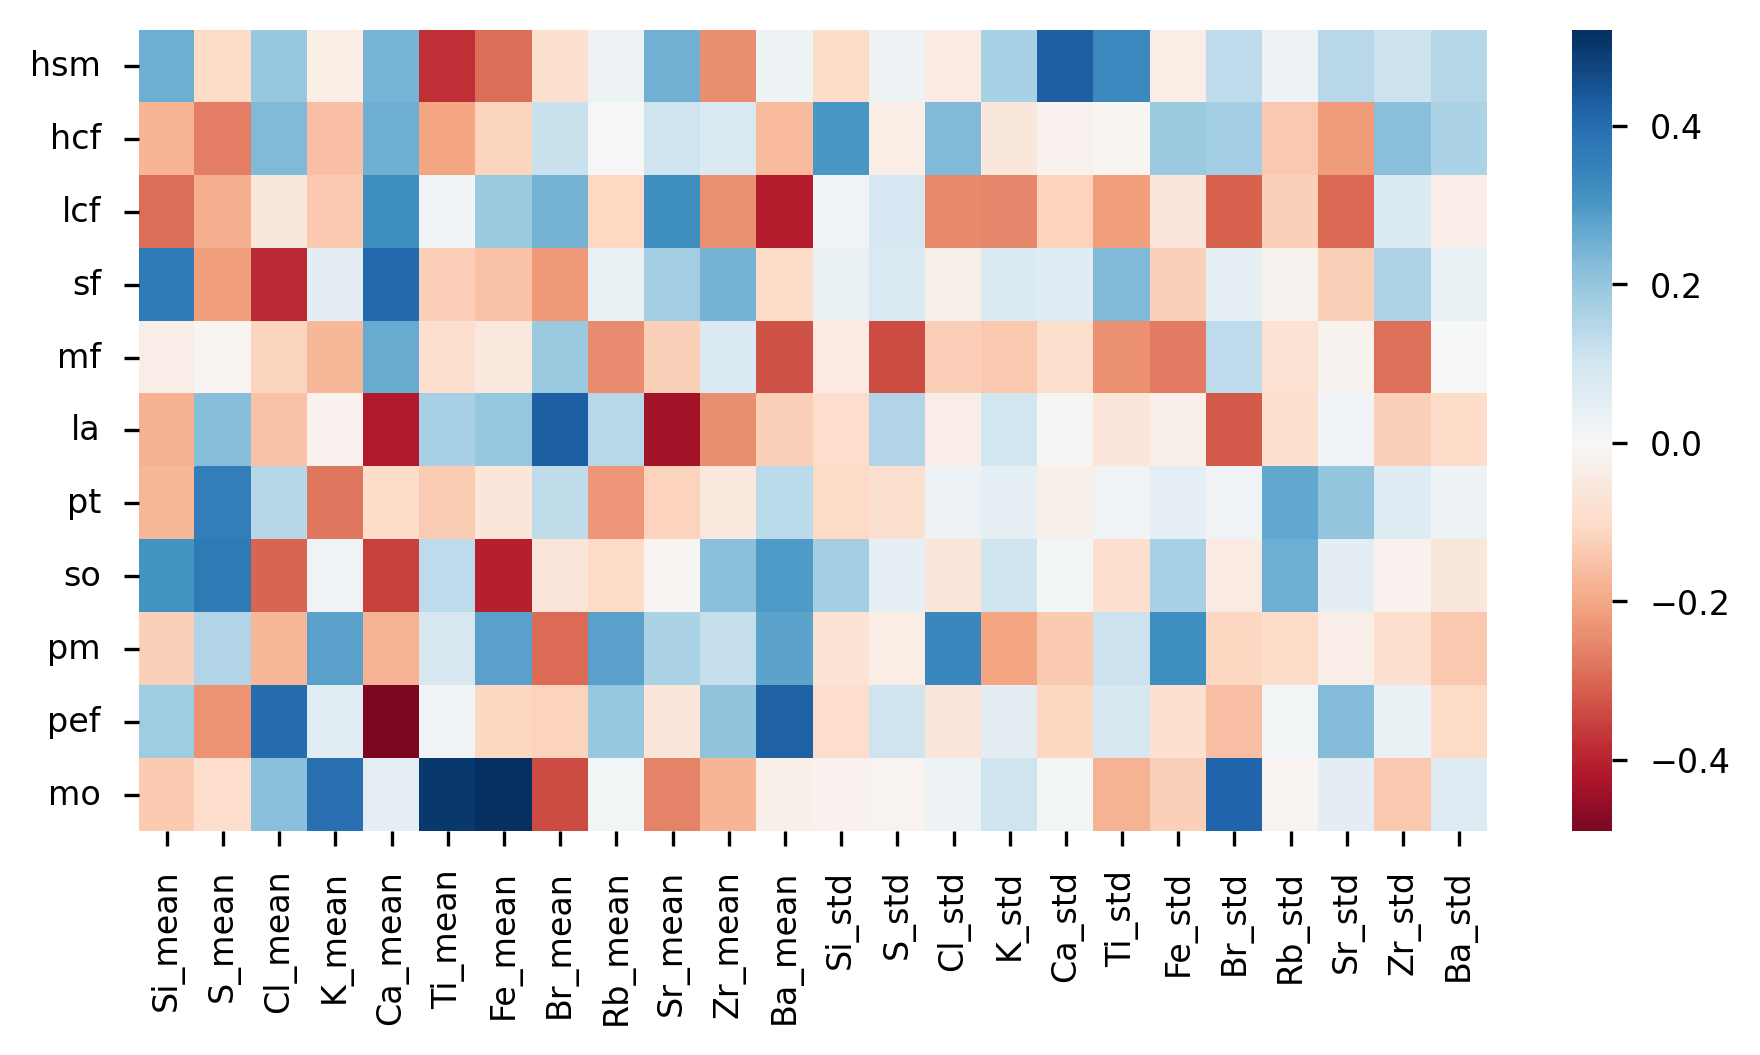

In [30]:
plt.figure(figsize=(7.25, 3.54))
sns.heatmap(coef, cmap='RdBu', 
    yticklabels=Facies, xticklabels=data_df.columns[:-2],
    center=0)#, ax=axes[1], 
            #cbar_kws = {'label' : 'Probability', 'ticks': [0, 0.25, 0.5, 0.75, 1]})
plt.yticks(rotation=0, va='center')
plt.savefig('results/r_coef_roll+lr_{}.png'.format(date))
print(date)